# import packages

In [9]:
import warnings
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from pandas_datareader._utils import RemoteDataError

warnings.filterwarnings('ignore')

# import data

In [2]:
data = pd.read_csv("../data/holdings_summary.csv")

# get prices for unique ticker codes

In [3]:
prices = pd.DataFrame()

prices['ticker']     = data[~data['ticker'].isin(['Cash'])]['ticker'].unique()
prices['price']      = prices.apply(lambda x : pdr.get_data_yahoo(x['ticker'] +".AX").iloc[-1]['Close'],axis=1)

cash_price = pd.DataFrame()

cash_price['ticker'] = ['Cash']
cash_price['price']  = [1]
prices               = pd.concat([prices,cash_price],axis=0).reset_index(drop=True)

# calculate current holding value

In [4]:
data          = pd.merge(data,right=prices,how='left',on='ticker')
data['value'] = data.apply(lambda x : np.dot(x['units'],x['price']),axis=1)

# summarise portfolio value

In [5]:
pd.pivot_table(data=data,index=['name'],values='value',aggfunc=np.sum).sort_values(by=['value'],ascending=False).reset_index(drop=False).style.format({"value": "{:,.0f}"}) 

,name,value
0,SW,"684,291"
1,TP,"593,649"
2,LY,"564,139"
3,SY,"560,082"
4,JP,"556,694"
5,KT,"555,067"
6,RW,"554,648"
7,AP,"520,694"
8,IL,"500,000"
9,KC,"500,000"


# show breakdown of holdings

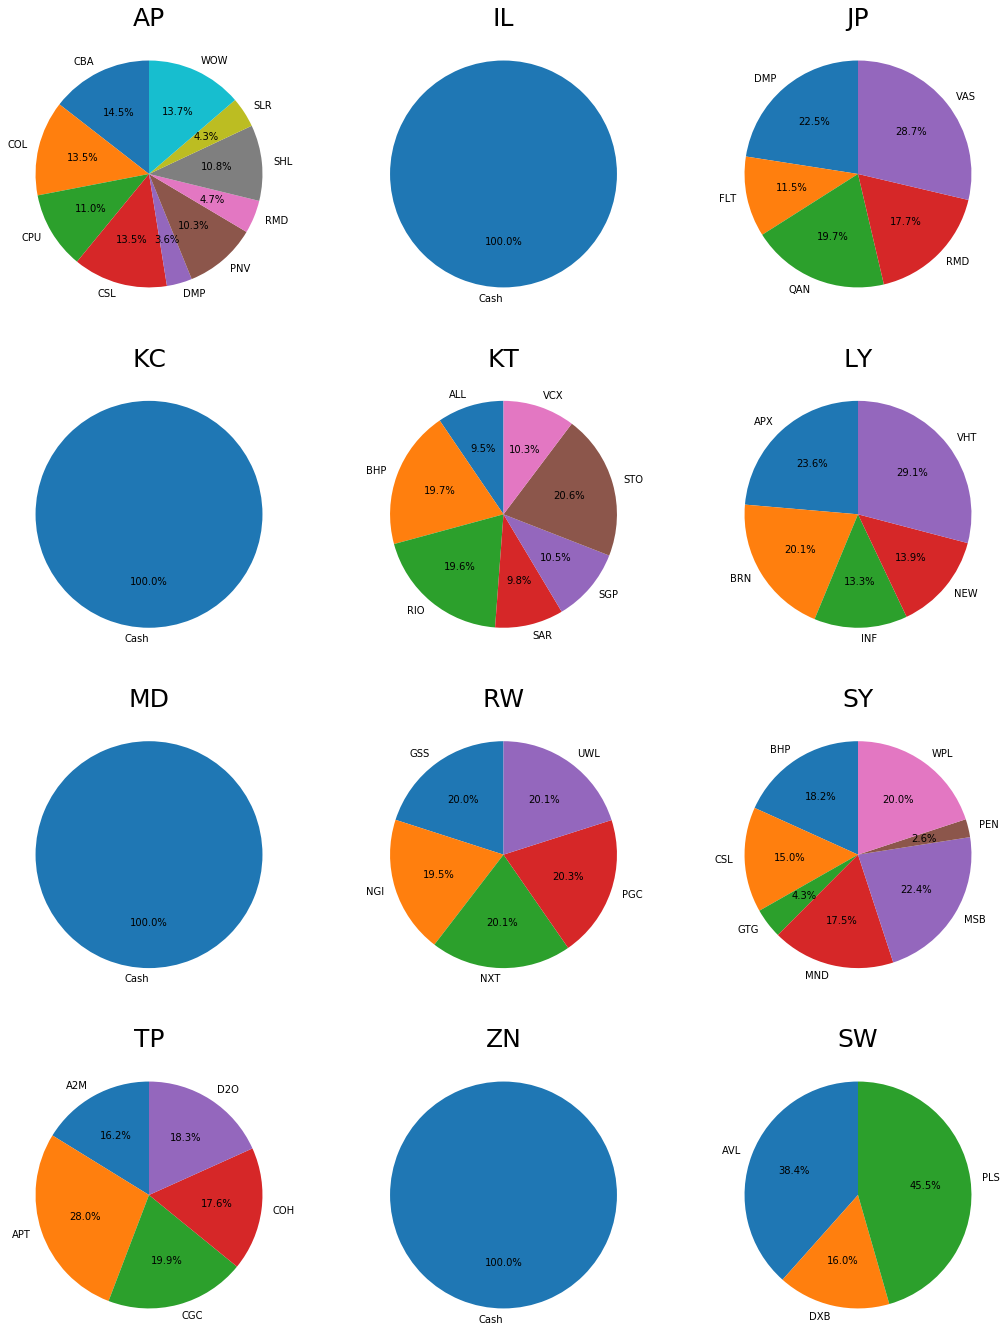

In [10]:
plt.figure(figsize=(18,24))
plot_num = 0
 
for index_i,i in enumerate(data['name'].unique()):
           
        plot_num += 1
        plt.subplot(4,3,plot_num)
        
        plot_data_i = pd.pivot_table(data=data[(data['name']==i) & (data['value'] > 500)],index=['name','ticker'],values=['value'],aggfunc=np.sum).reset_index(drop=False)
        plt.pie(plot_data_i['value'], labels=plot_data_i['ticker'], autopct='%1.1f%%',shadow=False, startangle=90)
        plt.title(i,fontsize=25)

plt.show()